## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedata = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
theMice = mousedata["Mouse ID"].value_counts()
numberMice= len(theMice)
numberMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse = mousedata.loc[mousedata.duplicated(subset=["Mouse ID","Timepoint"]),'Mouse ID'].unique()
duplicateMouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duppyMouse = mousedata.loc[mousedata["Mouse ID"] == "g989"]
duppyMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newMousey = mousedata.loc[mousedata["Mouse ID"] != "g989"]
newMousey

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
newy = newMousey["Mouse ID"].value_counts()
cleanMousey= len(newy)
cleanMousey

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mediany = newMousey.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
meany = newMousey.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
variancey = newMousey.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
standardvy = newMousey.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
semy = newMousey.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
daStatsDF = pd.DataFrame({"Mean": meany,
                        "Median": mediany,
                        "Variance": variancey,
                        "Standard Deviation": standardvy,
                        "SEM": semy})
daStatsDF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
sumtbl = newMousey.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
sumtbl





Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mice tested on each Drug Regimen')

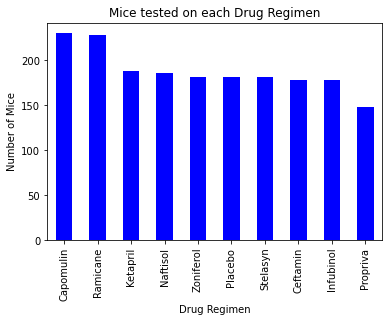

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugMouse = newMousey["Drug Regimen"].value_counts()
drugMouse.plot(kind="bar", color = "blue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice tested on each Drug Regimen")



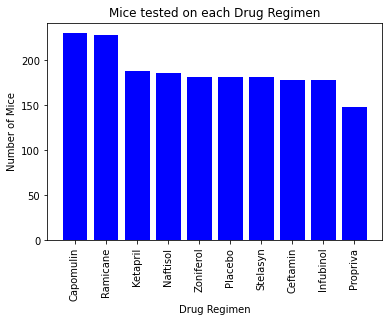

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugMouse = newMousey["Drug Regimen"].value_counts()
plt.bar(drugMouse.index.values,drugMouse.values, color="blue", align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice tested on each Drug Regimen")
plt.show()


Text(0.5, 1.0, 'Female vs Male Mice')

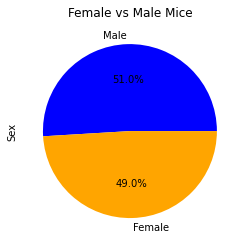

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexMouse = newMousey["Sex"].value_counts()
colors = ["blue", "orange"]
sexMouse.plot(kind="pie", colors = colors, autopct="%1.1f%%")
plt.title("Female vs Male Mice")

(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

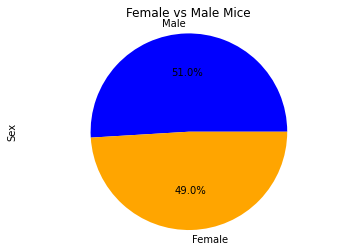

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexMouse = newMousey["Sex"].value_counts()
colors = ["blue", "orange"]
label = ["Male", "Female"]
explode = [0, 0]
plt.pie(sexMouse, explode=explode, colors=colors,
        autopct="%1.1f%%", labels = label)
plt.ylabel("Sex")
plt.title("Female vs Male Mice")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mergedMousey = newMousey[newMousey["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mergedMousey = mergedMousey.sort_values(["Timepoint"], ascending=True)
mergedMousey


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1391,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1370,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [48]:
# Put treatments into a list for plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for treatment in treatments:
    mergedMousey2 = mergedMousey.loc[mergedMousey["Drug Regimen"] == treatment,:]

    groupMouse = mergedMousey2.groupby('Mouse ID').max()['Timepoint']
    MouseDF = pd.DataFrame(groupMouse)
    MouseMerge = pd.merge(MouseDF, mergedMousey, on=("Mouse ID","Timepoint"),how="left")

    tumorvoldata.append(MouseMerge["Tumor Volume (mm3)"])
    
    quartiles =  MouseMerge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment} potential outliers: below {lower_bound} and above {upper_bound}.")

    #print(MouseDF)
    #print(MouseMerge)
    #print(tumorvoldata)


Capomulin potential outliers: below 20.70456164999999 and above 51.83201549.
Ramicane potential outliers: below 17.912664470000003 and above 54.30681135.
Infubinol potential outliers: below 36.83290494999999 and above 82.74144559000001.
Ceftamin potential outliers: below 25.355449580000002 and above 87.66645829999999.


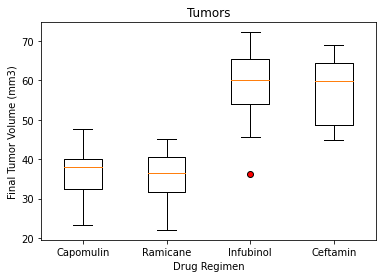

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
dotOutlier = dict(markerfacecolor='r')
ax1.boxplot(tumorvoldata, labels=treatments, flierprops = dotOutlier)



plt.show()




## Line and Scatter Plots

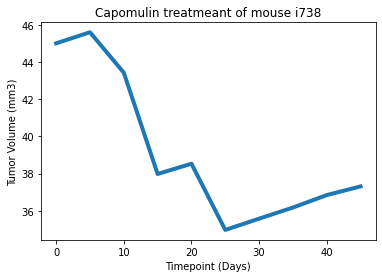

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
specialMousey = mergedMousey.loc[mergedMousey["Mouse ID"] == "i738",:]

x_axis = specialMousey["Timepoint"]
y_axis = specialMousey["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse i738')
plt.plot(x_axis, y_axis, linewidth=4, markersize=10)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

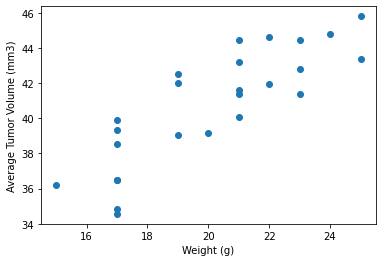

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capDF = newMousey.loc[newMousey["Drug Regimen"] == "Capomulin",:]

capomulin = capDF.groupby(['Mouse ID']).mean()
plt.scatter(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


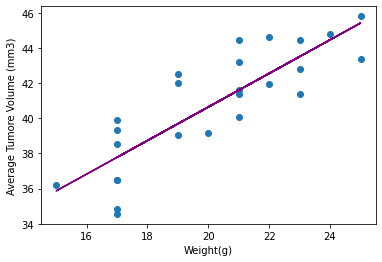

In [88]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


model=st.linregress(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])
#model
slope = 0.9544396890241045
intercept = 21.552160532685015

yValue = capomulin['Weight (g)']*slope+intercept
plt.scatter(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])
plt.plot(capomulin['Weight (g)'],yValue,color="purple")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()